In [ ]:
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
input_path = "/content/drive/MyDrive/IS_Final_Project/NN_Model/DatasetNN/input.csv"
labels_path = "/content/drive/MyDrive/IS_Final_Project/NN_Model/DatasetNN/labels.csv"
input_test_path = "/content/drive/MyDrive/IS_Final_Project/NN_Model/DatasetNN/input_test.csv"
labels_test_path = "/content/drive/MyDrive/IS_Final_Project/NN_Model/DatasetNN/labels_test.csv"

X_train = np.loadtxt(input_path, delimiter=',')
Y_train = np.loadtxt(labels_path, delimiter=',')

X_test = np.loadtxt(input_test_path, delimiter=',')
Y_test = np.loadtxt(labels_test_path, delimiter=',')

In [ ]:
# Reshape ข้อมูลให้ตรงกับ CNN Input (100x100x3)
X_train = X_train.reshape(-1, 100, 100, 3)
Y_train = Y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 100, 100, 3)
Y_test = Y_test.reshape(-1, 1)

#  Normalize ค่าให้อยู่ในช่วง [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
print("Shape of X_train ", X_train.shape)
print("Shape of Y_train ", Y_train.shape)
print("Shape of X_test ", X_test.shape)
print("Shape of Y_test ", Y_test.shape)

Shape of X_train  (2000, 100, 100, 3)
Shape of Y_train  (2000, 1)
Shape of X_test  (400, 100, 100, 3)
Shape of Y_test  (400, 1)


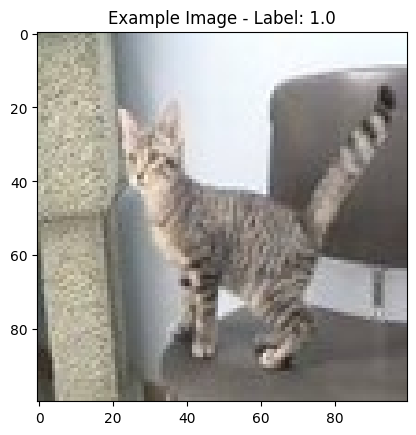

In [ ]:
idx = random.randint(0, len(X_train) - 1)
plt.imshow(X_train[idx])
plt.title(f"Example Image - Label: {Y_train[idx][0]}")
plt.show()

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary Classification (Dog vs Cat)
])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 998ms/step - accuracy: 0.9339 - loss: 0.1862 - val_accuracy: 0.6575 - val_loss: 0.8944
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 995ms/step - accuracy: 0.9700 - loss: 0.1103 - val_accuracy: 0.6725 - val_loss: 0.9647
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9728 - loss: 0.0828 - val_accuracy: 0.6825 - val_loss: 1.0240
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9919 - loss: 0.0503 - val_accuracy: 0.6600 - val_loss: 1.1764
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9953 - loss: 0.0265 - val_accuracy: 0.6900 - val_loss: 1.3608
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9988 - loss: 0.0183 - val_accuracy: 0.6675 - val_loss: 1.3425
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9997 - loss: 0.0082 - val_accuracy: 0.6675 - val_loss: 1.4479
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 0.6650 - val

In [ ]:
model_path = "/content/drive/MyDrive/IS_Final_Project/NN_Model/finalized_model.sav"
pickle.dump(model, open(model_path, 'wb'))
print(f"✅ Model saved at: {model_path}")

✅ Model saved at: /content/drive/MyDrive/IS_Final_Project/NN_Model/finalized_model.sav


In [ ]:
loaded_model = pickle.load(open(model_path, 'rb'))
print("✅ Model Loaded Successfully!")

✅ Model Loaded Successfully!


In [ ]:
loss, acc = loaded_model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {acc:.4f}")
print(f"Test Loss: {loss:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.6189 - loss: 2.0404
Test Accuracy: 0.6675
Test Loss: 1.6715


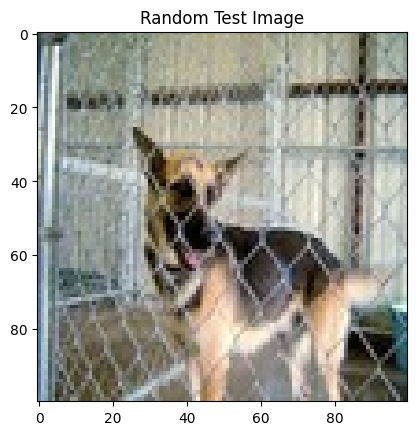

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Our model predicts it is a: Dog


In [ ]:
#  Making Predictions
idx2 = random.randint(0, len(Y_test) - 1)
plt.imshow(X_test[idx2])
plt.title("Random Test Image")
plt.show()

y_pred = loaded_model.predict(X_test[idx2].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

pred_class = "Dog" if y_pred[0][0] == 0 else "Cat"
print(f"Our model predicts it is a: {pred_class}")

In [ ]:
# Classification Report
y_pred_all = loaded_model.predict(X_test)
y_pred_classes = (y_pred_all > 0.5).astype(int)
print(classification_report(Y_test, y_pred_classes, target_names=['Dog', 'Cat']))

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step
              precision    recall  f1-score   support

         Dog       0.68      0.62      0.65       200
         Cat       0.65      0.71      0.68       200

    accuracy                           0.67       400
   macro avg       0.67      0.67      0.67       400
weighted avg       0.67      0.67      0.67       400



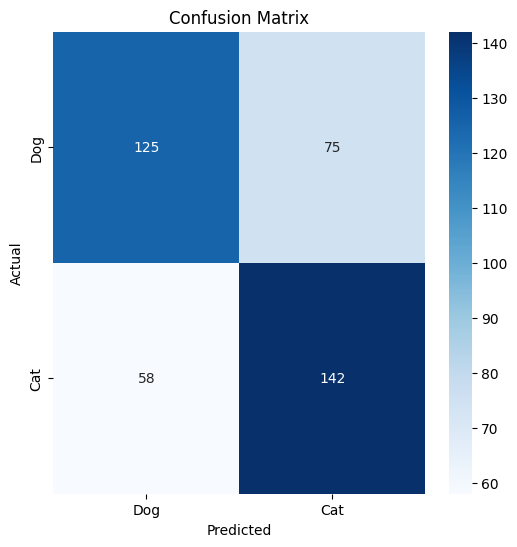

In [ ]:
# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred_classes)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dog', 'Cat'], yticklabels=['Dog', 'Cat'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

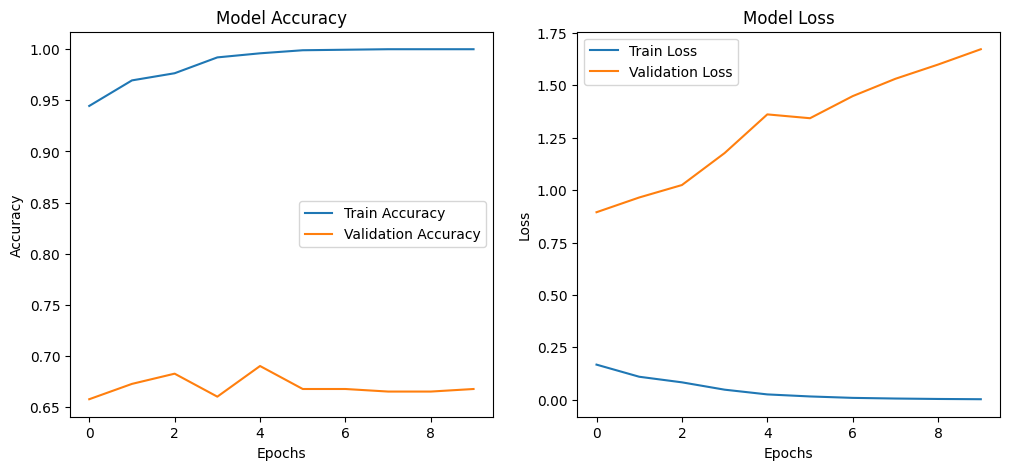

In [ ]:
#  Plot Accuracy & Loss Graphs
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()